In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from adjustText import adjust_text

In [2]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
one_letter ={'VAL':'V', 'ILE':'I', 'LEU':'L', 'GLU':'E', 'GLN':'Q', \
'ASP':'D', 'ASN':'N', 'HIS':'H', 'TRP':'W', 'PHE':'F', 'TYR':'Y',    \
'ARG':'R', 'LYS':'K', 'SER':'S', 'THR':'T', 'MET':'M', 'ALA':'A',    \
'GLY':'G', 'PRO':'P', 'CYS':'C'}
aas = one_letter.values()
pal = sns.color_palette("bright") + sns.color_palette("deep")
aa_pal = {aa:pal[i] for i, aa in enumerate(aas)}
aa_to_id = {aa:i for i, aa in enumerate(aas)}
aa_to_id['nan'] = -1
aa_to_id[np.nan] = -1
aa_to_id['-']=-1
aa_numeric_pal = matplotlib.colors.ListedColormap([(1,1,1)] + [pal[i] for i, aa in enumerate(aas)])
aa_pal["-"] = (1,1,1)

In [4]:
cbpal = sns.color_palette("colorblind")
clinvar_annot_pal = {
    False: pal[-3],
    "VUS/conflicting": pal[1],
    "Likely pathogenic": pal[3],
    "Pathogenic": pal[3],
    "Pathogenic/Likely pathogenic": pal[3],
    "Benign":pal[0],
    "Benign/Likely benign":pal[0],
    "Likely benign":pal[0],
    "Conflicting interpretations of pathogenicity":pal[4],
    "Uncertain significance":pal[-4],
    "not provided":pal[-3],
    False:pal[-3],
    np.nan:pal[-3],
    "Unannotated":pal[-3]
}
clnsig_pal = {"Pathogenic/Likely_pathogenic":cbpal[3],"Benign/Likely_benign":cbpal[0], "Conflicting":pal[4], "VUS":pal[4],"Unannotated":cbpal[-3]}

In [5]:
domain_pal_simple = {"LDLR class A":pal[-1], "LDLR class B":pal[3], "EGF-like":pal[-2], "":pal[-3]}

In [6]:
ukbb_scores = pd.read_csv('../Fig5c_hits/TableSX_tiling_screen_UKBmerged.20230817.alpha_fixed.csv')
fuse_scores = pd.read_csv("LDLR_FUSE_scores_from_BEAN_081723.csv")

In [7]:
fuse_scores['aastr'] = fuse_scores.gene_aa_str.map(lambda s: s.split("---")[-1])

In [50]:
ukb_annot = pd.read_csv("../../resources/UKBB/LDLR_FUSE_scores_from_BEAN_081123_sd05.csv")

In [9]:
ukb_annot["aastr"] = ukb_annot.aaref + ukb_annot.aapos.map(lambda x: int(x) if not np.isnan(x) else -1).astype(str) + ukb_annot.aaalt

In [10]:
fuse_scores = fuse_scores.merge(ukb_annot[['aastr', 'ClinicalSignificance']].rename(columns={"ClinicalSignificance":"clnsig"}), on="aastr")

In [11]:
ukbb_scores

,Unnamed: 0,edit,0,group,int_pos,pos,ref,ClinicalSignificance,aastr,domain,...,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975],mean_LDL
0,0,11224168:T>C,0,NaN,11224168,11224168,T,NaN,NaN,NaN,...,1.959374,1.007450,0.581657,0.592549,0.926256,0.639725,0.243418,-1.222879,2.407976,NaN
1,1,11224178:T>C,1,NaN,11224178,11224178,T,NaN,NaN,NaN,...,3.020201,1.009020,0.704915,0.568043,0.576063,0.986078,0.358430,-0.561019,1.697105,NaN
2,2,11224175:T>C,2,NaN,11224175,11224175,T,NaN,NaN,NaN,...,-0.712384,1.004579,0.482957,-0.246710,1.060710,-0.232589,0.098048,-2.325663,1.832243,NaN
3,3,11224184:T>C,3,NaN,11224184,11224184,T,NaN,NaN,NaN,...,5.061333,1.003172,0.814633,0.525688,0.318117,1.652497,0.553066,-0.097811,1.149187,NaN
4,4,11224186:A>G,4,NaN,11224186,11224186,A,NaN,NaN,NaN,...,-2.614248,1.014541,0.726223,-0.414007,0.485049,-0.853537,0.381496,-1.364686,0.536671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2177,11203069:T>C,2177,NaN,11203069,11203069,T,NaN,NaN,NaN,...,0.018073,1.008303,0.557142,0.004880,0.827022,0.005901,0.091655,-1.616053,1.625813,NaN
2178,2178,11203079:A>G,2178,NaN,11203079,11203079,A,NaN,NaN,NaN,...,-0.480952,1.007149,0.778830,-0.053798,0.342599,-0.157028,0.474873,-0.725279,0.617684,NaN
2179,2179,11203077:A>G,2179,NaN,11203077,11203077,A,NaN,NaN,NaN,...,3.423459,1.008165,0.805171,2.020993,1.808106,1.117740,0.561478,-1.522830,5.564816,NaN
2180,2180,11203076:A>G,2180,NaN,11203076,11203076,A,NaN,NaN,NaN,...,0.126056,1.007805,0.142061,0.094756,2.302323,0.041157,0.382238,-4.417714,4.607225,NaN


In [12]:
ukbb_scores.loc[ukbb_scores.coding == "coding", "aapos"] = ukbb_scores.loc[ukbb_scores.coding == "coding", "pos"].map(lambda s: int(s[1:]))
ukbb_scores.loc[ukbb_scores.coding == "coding", "aaref"] = ukbb_scores.loc[ukbb_scores.coding == "coding", "ref"]
ukbb_scores.loc[ukbb_scores.coding == "coding", "aaalt"] = ukbb_scores.loc[ukbb_scores.coding == "coding", "alt"]

In [13]:
ukbb_scores = ukbb_scores.merge(fuse_scores[["aastr", "final_score_lite", "final_score", "clnsig"]], on="aastr", how='outer')

In [14]:
ukbb_scores = ukbb_scores.rename(columns={"final_score_lite":"FUSE_observed", "final_score":"FUSE_all"})

In [15]:
ukbb_scores.ClinicalSignificance.value_counts()

Likely_pathogenic                               84
Pathogenic/Likely_pathogenic                    35
Conflicting_interpretations_of_pathogenicity    27
Uncertain_significance                          16
Pathogenic                                      12
Likely_benign                                   10
not_provided                                     6
Benign                                           3
Benign/Likely_benign                             2
Name: ClinicalSignificance, dtype: int64

In [16]:
ukbb_scores["clinvar_annot_4"] = "Unannotated"
ukbb_scores.loc[ukbb_scores.clnsig.isin(["Pathogenic", "Likely pathogenic", "Pathogenic/Likely pathogenic"]), "clinvar_annot_4"] = "Pathogenic/Likely_pathogenic"
ukbb_scores.loc[ukbb_scores.clnsig.isin(["Benign", "Likely benign", "Benign/Likely benign"]), "clinvar_annot_4"] = "Benign/Likely_benign"
ukbb_scores.loc[ukbb_scores.clnsig == "Conflicting interpretations of pathogenicity", "clinvar_annot_4"] = "Conflicting"
ukbb_scores.loc[ukbb_scores.clnsig == "Uncertain significance", "clinvar_annot_4"] = "VUS"
ukbb_scores.loc[ukbb_scores.clinvar_annot_4.isnull(), "clinvar_annot_4"] = "Unannotated"

### LDLR class A repeat

In [17]:
def get_corr_df(df, cols_show, pfam_col="PFAM_ref", missense_only = True):
    df = df.loc[df.aaref != df.aaalt]
    spearman_corr_alnposagg = df.groupby("domain_rel_pos_aligned")[cols_show].mean().corr('spearman')[['mean_LDL', pfam_col]]#.style.background_gradient()
    pearson_corr_alnposagg = df.groupby("domain_rel_pos_aligned")[cols_show].mean().corr()[['mean_LDL', pfam_col]]#.style.background_gradient()
    spearman_corr_posagg = df.groupby(["domain_rel_pos_aligned", "domain_family_idx"])[cols_show].mean().corr('spearman')
    pearson_corr_posagg = df.groupby(["domain_rel_pos_aligned", "domain_family_idx"])[cols_show].mean().corr()
    spearman_corr = df[cols_show].corr('spearman')[['mean_LDL', pfam_col]]
    pearson_corr = df[cols_show].corr()[['mean_LDL', pfam_col]]
    corr_dfs = [pearson_corr, pearson_corr_posagg, pearson_corr_alnposagg, 
               spearman_corr, spearman_corr_posagg, spearman_corr_alnposagg]
    labels = ['pearson', 'pearson, posagg', 'pearson, alinged pos agg', 'spearman', 'spearman, posagg', 'spearman, aligned pos agg']
    mean_LDL_dfs = pd.DataFrame({l:df['mean_LDL'] for l, df in zip(labels, corr_dfs)})
    pfam_dfs = pd.DataFrame({l:df[pfam_col] for l, df in zip(labels, corr_dfs)})
    return mean_LDL_dfs.iloc[:-1,:], pfam_dfs.iloc[:-2, :]

In [18]:
ldlr_res = pd.read_csv("../Fig5d/20230505_ldlr_a_0.1_0.3.csv")

In [19]:
ldlr_res_pos = ldlr_res[['int_pos', 'ref', 'alt', 'domain', 'domain_rel_pos_aligned', 'domain_family_idx']].rename(columns={"int_pos":"aapos", "ref":"aaref", "alt":"aaalt"})[["aapos", "domain_rel_pos_aligned", "domain_family_idx"]]

In [20]:
ldlr_a = ukbb_scores.merge(ldlr_res_pos, on = ["aapos"])

In [21]:
cols_show = ["mu_z_adj", "FUSE_all", "FUSE_observed", "delta_pfam_a","mean_LDL",]

### Load PFAM

In [22]:
ldlr_a_pfam = pd.read_excel("../../resources/LDLR/Ldl_recept_a.hmm.xlsx", header=3).rename(columns={"re-align":'domain_rel_pos_aligned'})

In [23]:
ldlr_a_pfam['PFAM_ref_a'] = [ldlr_a_pfam.loc[i, ldlr_a_pfam.consensus[i].upper()] for i in range(len(ldlr_a_pfam))]
ldlr_a_pfam_long = pd.melt(ldlr_a_pfam.loc[:, ~ldlr_a_pfam.columns.isin(['HMM','consensus', 'PFAM_ref_a'])], id_vars=['domain_rel_pos_aligned',], var_name = "aa", value_name = "pfam_a_score")

In [24]:
ldlr_a = ldlr_a.merge(ldlr_a_pfam_long.rename(columns={"pfam_a_score":"PFAM_ref_a", "aa":"aaref"}), on = ['domain_rel_pos_aligned', 'aaref'], how='left')
ldlr_a = ldlr_a.merge(ldlr_a_pfam_long.rename(columns={"pfam_a_score":"PFAM_alt_a", "aa":"aaalt"}), on = ['domain_rel_pos_aligned', 'aaalt'], how='left')
ldlr_a['delta_pfam_a'] = ldlr_a.PFAM_alt_a - ldlr_a.PFAM_ref_a

In [25]:
ldlr_a['delta_pfam_a'].min()

-2.9693500000000004

In [26]:
ldlr_a['delta_pfam_a'].max()

5.5280700000000005

In [27]:
ldladj_corrs, pfam_corrs = get_corr_df(ldlr_a, cols_show, pfam_col = "delta_pfam_a")

In [28]:
ldladj_corrs.style.background_gradient(cmap='PuBu_r')

,pearson,"pearson, posagg","pearson, alinged pos agg",spearman,"spearman, posagg","spearman, aligned pos agg"
mu_z_adj,-0.253108,-0.418044,-0.372308,-0.279370,-0.486068,-0.532143
FUSE_all,0.417102,0.589599,0.685128,0.483699,0.713106,0.753571
FUSE_observed,0.417102,0.589599,0.685128,0.483699,0.713106,0.753571
delta_pfam_a,0.440520,0.574814,0.457406,0.441885,0.623436,0.338377


In [29]:
cols_show = ["mu_z_adj", "FUSE_all", "FUSE_observed", "PFAM_ref_a","mean_LDL",]
_, pfam_corrs_ref = get_corr_df(ldlr_a, cols_show, pfam_col = "PFAM_ref_a")

In [30]:
pfam_corrs.style.background_gradient()

,pearson,"pearson, posagg","pearson, alinged pos agg",spearman,"spearman, posagg","spearman, aligned pos agg"
mu_z_adj,-0.590268,-0.631825,-0.852876,-0.516520,-0.565739,-0.638001
FUSE_all,0.627274,0.683341,0.685282,0.554922,0.632279,0.588721
FUSE_observed,0.627274,0.683341,0.685282,0.554922,0.632279,0.588721


In [31]:
ldlr_a

,Unnamed: 0,edit,0,group,int_pos,pos,ref,ClinicalSignificance,aastr,domain,...,aaalt,FUSE_observed,FUSE_all,clnsig,clinvar_annot_4,domain_rel_pos_aligned,domain_family_idx,PFAM_ref_a,PFAM_alt_a,delta_pfam_a
0,883.0,A26:R>G,883.0,missense,-1.0,A26,R,NaN,R26G,LDLR class A 1,...,G,NaN,NaN,NaN,Unannotated,5,1,2.48847,3.62781,1.13934
1,883.0,A26:R>G,883.0,missense,-1.0,A26,R,NaN,R26G,LDLR class A 1,...,G,NaN,NaN,NaN,Unannotated,5,1,2.48847,3.62781,1.13934
2,887.0,A26:R>R,887.0,syn,-1.0,A26,R,NaN,R26R,LDLR class A 1,...,R,NaN,NaN,NaN,Unannotated,5,1,2.48847,2.48847,0.00000
3,887.0,A26:R>R,887.0,syn,-1.0,A26,R,NaN,R26R,LDLR class A 1,...,R,NaN,NaN,NaN,Unannotated,5,1,2.48847,2.48847,0.00000
4,884.0,A25:D>G,884.0,missense,-1.0,A25,D,NaN,D25G,LDLR class A 1,...,G,NaN,NaN,NaN,Unannotated,4,1,2.65578,3.10390,0.44812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1567.0,A311:K>K,1567.0,syn,-1.0,A311,K,NaN,K311K,LDLR class A 7,...,K,NaN,NaN,NaN,Unannotated,43,7,NaN,NaN,NaN
607,1567.0,A311:K>K,1567.0,syn,-1.0,A311,K,NaN,K311K,LDLR class A 7,...,K,NaN,NaN,NaN,Unannotated,43,7,NaN,NaN,NaN
608,1567.0,A311:K>K,1567.0,syn,-1.0,A311,K,NaN,K311K,LDLR class A 7,...,K,NaN,NaN,NaN,Unannotated,43,7,NaN,NaN,NaN
609,1565.0,A313:C>R,1565.0,missense,-1.0,A313,C,Conflicting_interpretations_of_pathogenicity,C313R,LDLR class A 7,...,R,NaN,NaN,NaN,Unannotated,46,7,0.09939,5.62746,5.52807


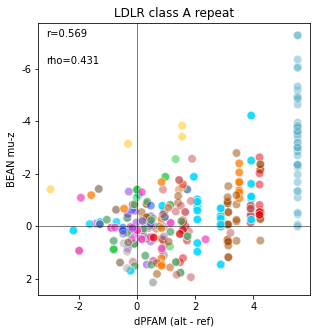

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
ldlr_a['neg_delta_pfam_a'] = -ldlr_a['delta_pfam_a']
sns.scatterplot(data = ldlr_a.loc[ldlr_a.aaref != ldlr_a.aaalt], x = "delta_pfam_a", y = "mu_z_adj", hue = "aaref", palette=aa_pal, s= 70, alpha = 0.5)
ax.invert_yaxis()
ax.set_xlabel(r"dPFAM (alt - ref)")
ax.set_ylabel("BEAN mu-z")
ax.text(0.03, 0.85, r"rho" + f"={ldlr_a[['neg_delta_pfam_a', 'mu_z_adj']].corr('spearman').iloc[0, 1]:.3f}", transform=ax.transAxes)
ax.text(0.03, 0.95, r"r" + f"={ldlr_a[['neg_delta_pfam_a', 'mu_z_adj']].corr().iloc[0, 1]:.3f}", transform=ax.transAxes)
ax.set_title("LDLR class A repeat")
ax.legend('',frameon=False)
ax.set_box_aspect(1)
ax.axhline(0, color='black', linewidth = 0.5)
ax.axvline(0, color='black', linewidth = 0.5)
plt.savefig("Fig5_neg_dPFAM_refaa.pdf", bbox_inches="tight")

## LDLR-B

In [33]:
ldlr_b_res = pd.read_csv("../Fig5d/20230629_ldlr_b_0.1_0.3.csv")

In [34]:
ldlr_b_res_pos = ldlr_b_res[['int_pos', 'ref', 'alt', 'domain', 'domain_rel_pos_aligned', 'domain_family_idx']].rename(columns={"int_pos":"aapos", "ref":"aaref", "alt":"aaalt"})[["aapos", "domain_rel_pos_aligned", "domain_family_idx"]]

In [35]:
ldlr_b = ukbb_scores.merge(ldlr_b_res_pos, on = ["aapos"])

### Load PFAM

In [36]:
ldlr_b_pfam = pd.read_excel("../../resources/LDLR/Ldl_recept_b.hmm.xlsx", header=2).rename(columns={"re-align":'domain_rel_pos_aligned'})

In [37]:
ldlr_b_pfam['PFAM_ref_b'] = [ldlr_b_pfam.loc[i, ldlr_b_pfam.consensus[i].upper()] for i in range(len(ldlr_b_pfam))]
ldlr_b_pfam_long = pd.melt(ldlr_b_pfam.loc[:, ~ldlr_b_pfam.columns.isin(['HMM','consensus', 'PFAM_ref_a'])], id_vars=['domain_rel_pos_aligned'], var_name = "aa", value_name = "pfam_b_score")

In [38]:
ldlr_b = ldlr_b.merge(ldlr_b_pfam_long.rename(columns={"pfam_b_score":"PFAM_ref_b", "aa":"aaref"}), on = ['domain_rel_pos_aligned', 'aaref'], how='left')
ldlr_b = ldlr_b.merge(ldlr_b_pfam_long.rename(columns={"pfam_b_score":"PFAM_alt_b", "aa":"aaalt"}), on = ['domain_rel_pos_aligned', 'aaalt'], how='left')
ldlr_b['delta_pfam_b'] = ldlr_b.PFAM_alt_b - ldlr_b.PFAM_ref_b

In [39]:
cols_show = ["mu_z_adj", "FUSE_all", "FUSE_observed", "delta_pfam_b", "mean_LDL",]
ldladj_corrs_b, pfam_corrs_b = get_corr_df(ldlr_b, cols_show, pfam_col = "delta_pfam_b")

In [40]:
ldladj_corrs_b.style.background_gradient(cmap='PuBu_r')

,pearson,"pearson, posagg","pearson, alinged pos agg",spearman,"spearman, posagg","spearman, aligned pos agg"
mu_z_adj,-0.586884,-0.608839,-0.488937,-0.503263,-0.633065,-0.617391
FUSE_all,0.631226,0.645970,0.648626,0.608574,0.646371,0.670435
FUSE_observed,0.631226,0.645970,0.648626,0.608574,0.646371,0.670435
delta_pfam_b,0.478953,0.418566,0.039014,0.499614,0.416140,0.081203


In [41]:
pfam_corrs_b.style.background_gradient()

,pearson,"pearson, posagg","pearson, alinged pos agg",spearman,"spearman, posagg","spearman, aligned pos agg"
mu_z_adj,-0.343083,-0.381228,-0.529384,-0.287108,-0.361683,-0.396159
FUSE_all,0.554873,0.567211,0.276812,0.504681,0.510515,0.329323
FUSE_observed,0.554873,0.567211,0.276812,0.504681,0.510515,0.329323


In [42]:
cols_show = ["mu_z_adj", "FUSE_all", "FUSE_observed", "PFAM_ref_b","mean_LDL",]
_, pfam_corrs_ref_b = get_corr_df(ldlr_b, cols_show, pfam_col = "PFAM_ref_b")

## Main figure

In [52]:
plt.style.use('jr')

In [57]:
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [61]:
ukbb_scores.loc[~ukbb_scores.mean_LDL.isnull(),].clinvar_annot_4.value_counts()

Unannotated                     29
VUS                             19
Pathogenic/Likely_pathogenic    14
Conflicting                     12
Benign/Likely_benign             2
Name: clinvar_annot_4, dtype: int64

In [65]:
sum((~pdf.mu_z_adj.isnull()) & (~pdf.mean_LDL.isnull()))

76

In [64]:
pdf.mu_z_adj

0       0.639725
1       0.986078
2      -0.232589
3       1.652497
4      -0.853537
          ...   
2459         NaN
2460         NaN
2461         NaN
2462         NaN
2463         NaN
Name: mu_z_adj, Length: 2464, dtype: float64

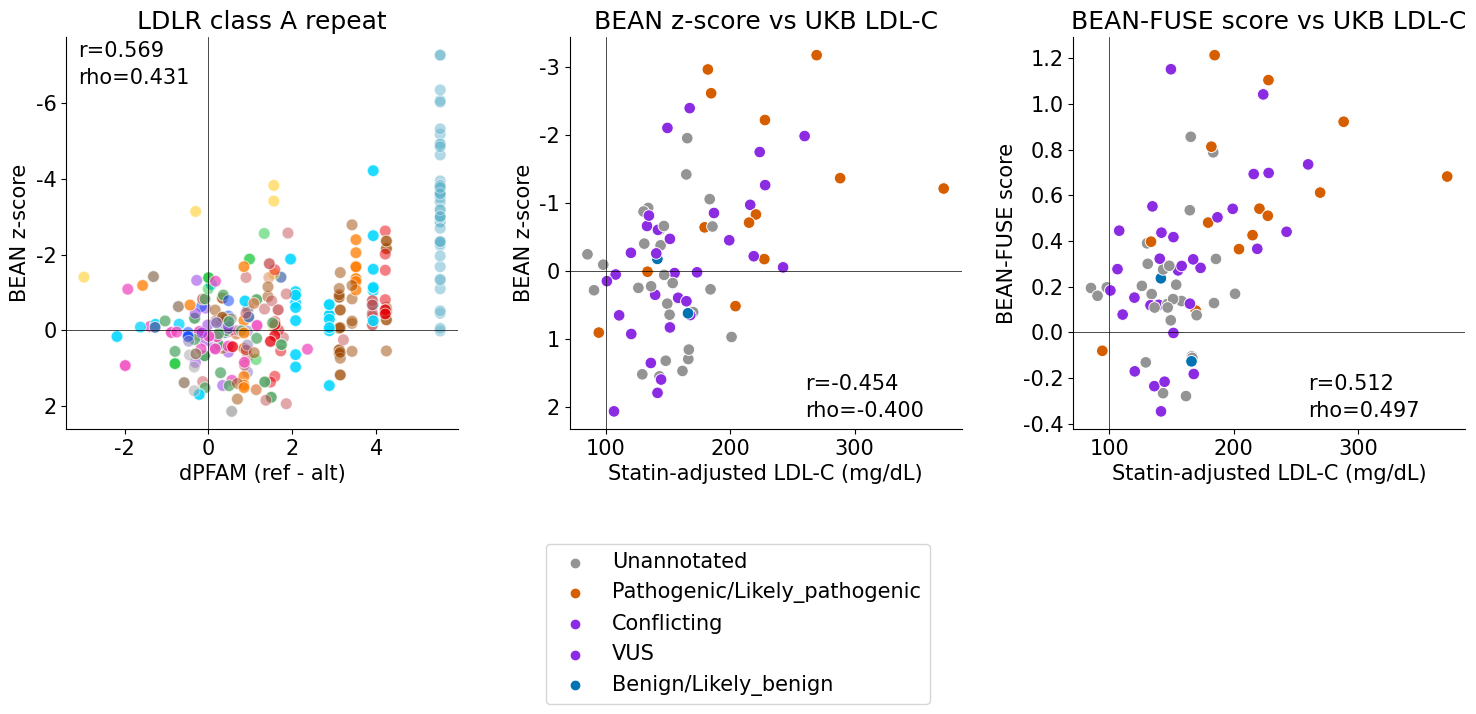

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# LDLR class A repeat PFAM score vs BEAN z-score
ldlr_a['neg_delta_pfam_a'] = -ldlr_a['delta_pfam_a']
ldlr_a['neg_mu_z_adj'] = -ldlr_a['mu_z_adj']
sns.scatterplot(data = ldlr_a.loc[ldlr_a.aaref != ldlr_a.aaalt], x = "delta_pfam_a", y = "mu_z_adj", hue = "aaref", palette=aa_pal, s= 70, alpha = 0.5, ax = ax[0])
ax[0].set_xlabel(r"dPFAM (ref - alt)")
ax[0].set_ylabel("BEAN z-score")
ax[0].invert_yaxis()
ax[0].text(0.03, 0.88, f"rho={ldlr_a[['neg_delta_pfam_a', 'mu_z_adj']].corr('spearman').iloc[0, 1]:.3f}", transform = ax[0].transAxes)
ax[0].text(0.03, 0.95, f"r={ldlr_a[['neg_delta_pfam_a', 'mu_z_adj']].corr().iloc[0, 1]:.3f}", transform = ax[0].transAxes)
ax[0].set_title("LDLR class A repeat")
ax[0].legend('',frameon=False)
#ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].axhline(0, color='black', linewidth = 0.5)
ax[0].axvline(0, color='black', linewidth = 0.5)

# BEAN z-score vs UKB LDL-C
pdf = ukbb_scores
pdf['neg_mu_z_adj'] = -pdf['mu_z_adj']
sns.scatterplot(data = pdf, x = "mean_LDL", y = "mu_z_adj", s= 70, hue = "clinvar_annot_4", palette = clnsig_pal, ax = ax[1], )

ax[1].text(0.6, 0.03, f"rho={pdf[['mean_LDL', 'mu_z_adj']].corr('spearman').iloc[0, 1]:.3f}", transform = ax[1].transAxes)
ax[1].text(0.6, 0.1, f"r={pdf[['mean_LDL', 'mu_z_adj']].corr().iloc[0, 1]:.3f}", transform = ax[1].transAxes)
ax[1].invert_yaxis()
ax[1].axhline(0, color='black', linewidth = 0.5)
ax[1].axvline(100, color='black', linewidth = 0.5)
ax[1].set_ylabel("BEAN z-score")
ax[1].set_xlabel("Statin-adjusted LDL-C (mg/dL)")
ax[1].get_legend().remove()
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(np.array(handles), np.array(labels), bbox_to_anchor=(0.5, 0.2), loc = "upper center")
ax[1].set_title("BEAN z-score vs UKB LDL-C")

# BEAN-FUSE vs UKB LDL-C
sns.scatterplot(data = pdf, x = "mean_LDL", y = "FUSE_observed", s= 70, hue = "clinvar_annot_4", palette = clnsig_pal, ax = ax[2])
ax[2].get_legend().remove()
ax[2].text(0.6, 0.03, f"rho={pdf[['mean_LDL', 'FUSE_observed']].corr('spearman').iloc[0, 1]:.3f}", transform = ax[2].transAxes)
ax[2].text(0.6, 0.1, f"r={pdf[['mean_LDL', 'FUSE_observed']].corr().iloc[0, 1]:.3f}", transform = ax[2].transAxes)
ax[2].set_ylabel("BEAN-FUSE score")
ax[2].axhline(0, color='black', linewidth = 0.5)
ax[2].axvline(100, color='black', linewidth = 0.5)
ax[2].set_xlabel("Statin-adjusted LDL-C (mg/dL)")
ax[2].set_title("BEAN-FUSE score vs UKB LDL-C")
plt.setp(ax, box_aspect=1)
plt.tight_layout()
sns.despine(top=True, right=True)
fig.savefig("5fgh_20230811.pdf", bbox_inches="tight")

In [45]:
ukbb_scores

,Unnamed: 0,edit,0,group,int_pos,pos,ref,ClinicalSignificance,aastr,domain,...,0.975],mean_LDL,aapos,aaref,aaalt,FUSE_observed,FUSE_all,clnsig,clinvar_annot_4,neg_mu_z_adj
0,0.0,11224168:T>C,0.0,NaN,11224168.0,11224168,T,NaN,NaN,NaN,...,2.407976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unannotated,-0.639725
1,1.0,11224178:T>C,1.0,NaN,11224178.0,11224178,T,NaN,NaN,NaN,...,1.697105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unannotated,-0.986078
2,2.0,11224175:T>C,2.0,NaN,11224175.0,11224175,T,NaN,NaN,NaN,...,1.832243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unannotated,0.232589
3,3.0,11224184:T>C,3.0,NaN,11224184.0,11224184,T,NaN,NaN,NaN,...,1.149187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unannotated,-1.652497
4,4.0,11224186:A>G,4.0,NaN,11224186.0,11224186,A,NaN,NaN,NaN,...,0.536671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unannotated,0.853537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M852I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.118998,NaN,Unannotated,NaN
2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M852I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.118998,NaN,Unannotated,NaN
2461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L855M,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.061666,Uncertain significance,VUS,NaN
2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E856Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.217866,NaN,Unannotated,NaN


## All variants with FUSE prediction

In [67]:
fuse_imputation = pd.read_csv("../../resources/UKBB/LDLR_UKBpatient_variants_meanLDL_functional_scores_clinvar_082223.csv")

In [69]:
sum(~fuse_imputation.final_score.isnull())

358

In [74]:
fuse_imputation["clinvar_annot_4"] = "Unannotated"
fuse_imputation.loc[fuse_imputation.ClinicalSignificance.isin(["Pathogenic", "Likely pathogenic", "Pathogenic/Likely pathogenic"]), "clinvar_annot_4"] = "Pathogenic/Likely_pathogenic"
fuse_imputation.loc[fuse_imputation.ClinicalSignificance.isin(["Benign", "Likely benign", "Benign/Likely benign"]), "clinvar_annot_4"] = "Benign/Likely_benign"
fuse_imputation.loc[fuse_imputation.ClinicalSignificance == "Conflicting interpretations of pathogenicity", "clinvar_annot_4"] = "Conflicting"
fuse_imputation.loc[fuse_imputation.ClinicalSignificance == "Uncertain significance", "clinvar_annot_4"] = "VUS"
fuse_imputation.loc[fuse_imputation.clinvar_annot_4.isnull(), "clinvar_annot_4"] = "Unannotated"

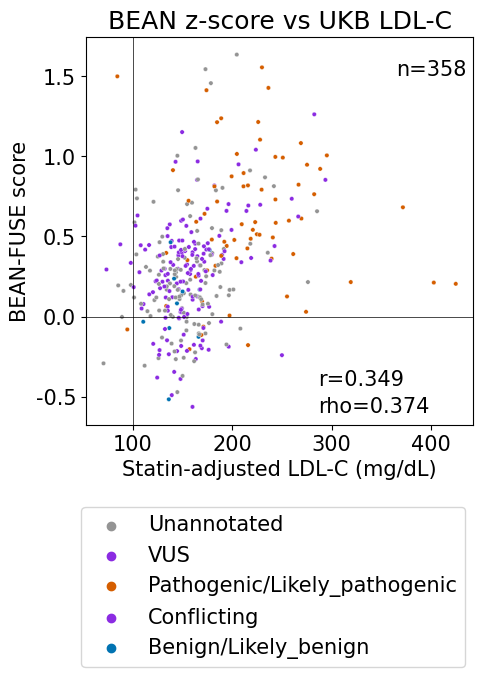

In [79]:
fig, ax = plt.subplots(figsize=(5, 9))

# BEAN z-score vs UKB LDL-C

sns.scatterplot(data = fuse_imputation, x = "mean_LDL", y = "final_score", s=10,hue = "clinvar_annot_4", palette = clnsig_pal, ax = ax)

ax.text(0.6, 0.03, f"rho={fuse_imputation[['mean_LDL', 'final_score']].corr('spearman').iloc[0, 1]:.3f}", transform = ax.transAxes)
ax.text(0.6, 0.1, f"r={fuse_imputation[['mean_LDL', 'final_score']].corr().iloc[0, 1]:.3f}", transform = ax.transAxes)
ax.axhline(0, color='black', linewidth = 0.5)
ax.axvline(100, color='black', linewidth = 0.5)
ax.set_ylabel("BEAN-FUSE score")
ax.set_xlabel("Statin-adjusted LDL-C (mg/dL)")
ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(np.array(handles), np.array(labels), bbox_to_anchor=(0.5, 0.2), loc = "upper center")
ax.text(0.8, 0.9, f"n={len(fuse_imputation.loc[~fuse_imputation.final_score.isnull() & (~fuse_imputation.mean_LDL.isnull())])}", transform=ax.transAxes)
ax.set_title("BEAN z-score vs UKB LDL-C")
plt.setp(ax, box_aspect=1)

fig.savefig("S_allscores.pdf", bbox_inches="tight")

## Save table used for plotting

In [80]:
ldlr_a.to_csv("Fig5f_ldlr_a_score_with_pfam.csv")

In [81]:
ldlr_b.to_csv("Fig5fS_ldlr_b_score_with_pfam.csv")